### BUSINESS OBJECTIVE
To develop a predictive model capable of detecting the presence of three specific medical conditions based on measurements of health characteristics. The model will aid researchers in identifying potential patients who may have one or more of the specified medical conditions without requiring a long and intrusive process of data collection from patients.

### DATA DICTIONARY
1. train.csv - The training set.
- (I). Id Unique identifier for each observation.
- (II). AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
- (III). Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.
2. test.csv - The test set. Your goal is to predict the probability that a subject in this set belongs to each of the two classes.
3. greeks.csv - Supplemental metadata, only available for the training set.
-(I). Alpha Identifies the type of age-related condition, if present.
-(II). A No age-related condition. Corresponds to class 0.
-(III). B, D, G The three age-related conditions. Correspond to class 1.
- (IV). Beta, Gamma, Delta Three experimental characteristics.
- (V). Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected.

### IMPORTING NECESSARY LIBARIES

In [1]:
import pandas as pd
import numpy as np     
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy import stats
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    make_scorer,
)

## Loading the dataset

In [2]:
#import the csv file
df = pd.read_csv('C:/Users/anura/OneDrive/Desktop/CST2008 Kaggle/train.csv', encoding= 'unicode_escape')

## Exploratory Data Analysis

### Shape of the dataset

In [3]:
print(f"  dataset shape is {df.shape}")

  dataset shape is (617, 58)


- This dataset contains 816 rows and 57 columns

###  Sapmle Dataset

In [4]:
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
df.tail()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0
616,ffcca4ded3bb,0.482849,2672.53426,546.663930,112.006102,8.138688,3.198099,0.116928,3.396778,7.948668,...,0.173229,1.14492,0.149006,13.673940,72.611063,6850.484442,45.745974,114.842372,21.978000,0


The data set has 617 rows and 58 unique features

### Data types

In [6]:
df.dtypes

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

### Detailed information about dataset

In [7]:
#Check the info and datatypes for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

It consists of a mix of numerical and categorical data. Most of the columns (55 out of 58) are of numerical type ('float64'), while one column ('Class') is of integer type ('int64'),  the 'EJ' column is of type 'object', suggesting it may be a categorical feature

### Unique values

In [8]:
df.nunique()

Id       617
AB       217
AF       599
AH       227
AM       605
AR       130
AX       427
AY       148
AZ       484
BC       259
BD       617
BN        53
BP       612
BQ       515
BR       566
BZ       115
CB       553
CC       602
CD       584
CF       586
CH       135
CL       123
CR       595
CS       576
CU       307
CW       426
DA       611
DE       616
DF       137
DH       191
DI       571
DL       604
DN       576
DU       253
DV        39
DY       590
EB       439
EE       513
EG       610
EH       127
EJ         2
EL       311
EP       275
EU       455
FC       600
FD       337
FE       615
FI       498
FL       388
FR       435
FS       161
GB       560
GE       264
GF       611
GH       596
GI       615
GL       355
Class      2
dtype: int64

- Some columns have very few unique values, such as 'EJ' and 'Class', which only has 2 unique values each. This suggests that 'EJ' might be a binary categorical feature and 'Class' might be a binary target variable in a classification task.

### Statistical information

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


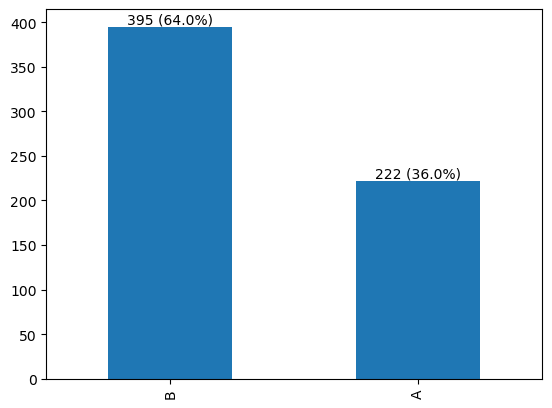

In [10]:
EJ_counts = df['EJ'].value_counts()

# Calculate the total count
total_count = EJ_counts.sum()

# Create the bar plot
ax = EJ_counts.plot(kind='bar')

# Annotate each bar with its count and percentage
for i, count in enumerate(EJ_counts):
    percentage = count / total_count * 100
    ax.annotate(f'{count} ({percentage:.1f}%)', (i, count), ha='center', va='bottom')

# Display the plot
plt.show()

## Data Preparation

The dataset is going to be checked for missing values, unique values and duplicates, so they can adjusted to suit future analysis.

### Missing value

In [11]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [12]:
print(f'Duplicated values: {df.duplicated().sum()}')
print(df.shape)

Duplicated values: 0
(617, 58)


Observation: there were no duplicated rows found, and the dataframe is ready for further analysis

In [13]:
df.head().T

,0,1,2,3,4
Id,000ff2bfdfe9,007255e47698,013f2bd269f5,043ac50845d5,044fb8a146ec
AB,0.209377,0.145282,0.47003,0.252107,0.380297
AF,3109.03329,978.76416,2635.10654,3819.65177,3733.04844
AH,85.200147,85.200147,85.200147,120.201618,85.200147
AM,22.394407,36.968889,32.360553,77.112203,14.103738
AR,8.138688,8.138688,8.138688,8.138688,8.138688
AX,0.699861,3.63219,6.73284,3.685344,3.942255
AY,0.025578,0.025578,0.025578,0.025578,0.05481
AZ,9.812214,13.51779,12.82457,11.053708,3.396778
BC,5.555634,1.2299,1.2299,1.2299,102.15198


## Visualization and Feature Engineering

### Features reduction

#### Dropping The ID Column

- **Dropping Id Column As it is not contributing in our model**

In [14]:
df.drop('Id', axis=1, inplace=True)

#### Chechking Count  Class

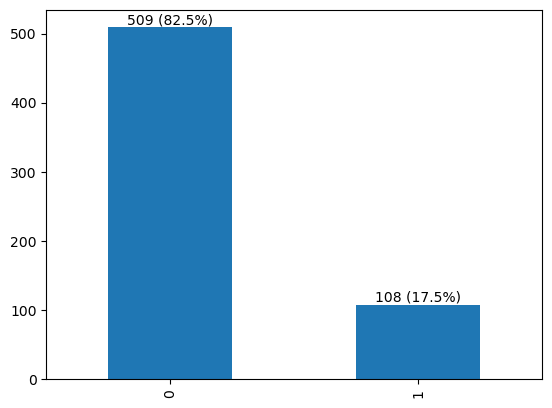

In [15]:
class_counts = df['Class'].value_counts()

# Calculate the total count
total_count = class_counts.sum()

# Create the bar plot
ax = class_counts.plot(kind='bar')

# Annotate each bar with its count and percentage
for i, count in enumerate(class_counts):
    percentage = count / total_count * 100
    ax.annotate(f'{count} ({percentage:.1f}%)', (i, count), ha='center', va='bottom')

# Display the plot
plt.show()

###### 
We were able to get insights into the distribution of classes in the 'Class' column of the DataFrame. We saw how many occurrences are there for each class and the corresponding percentage of each class out of the total count. 

### Correlation

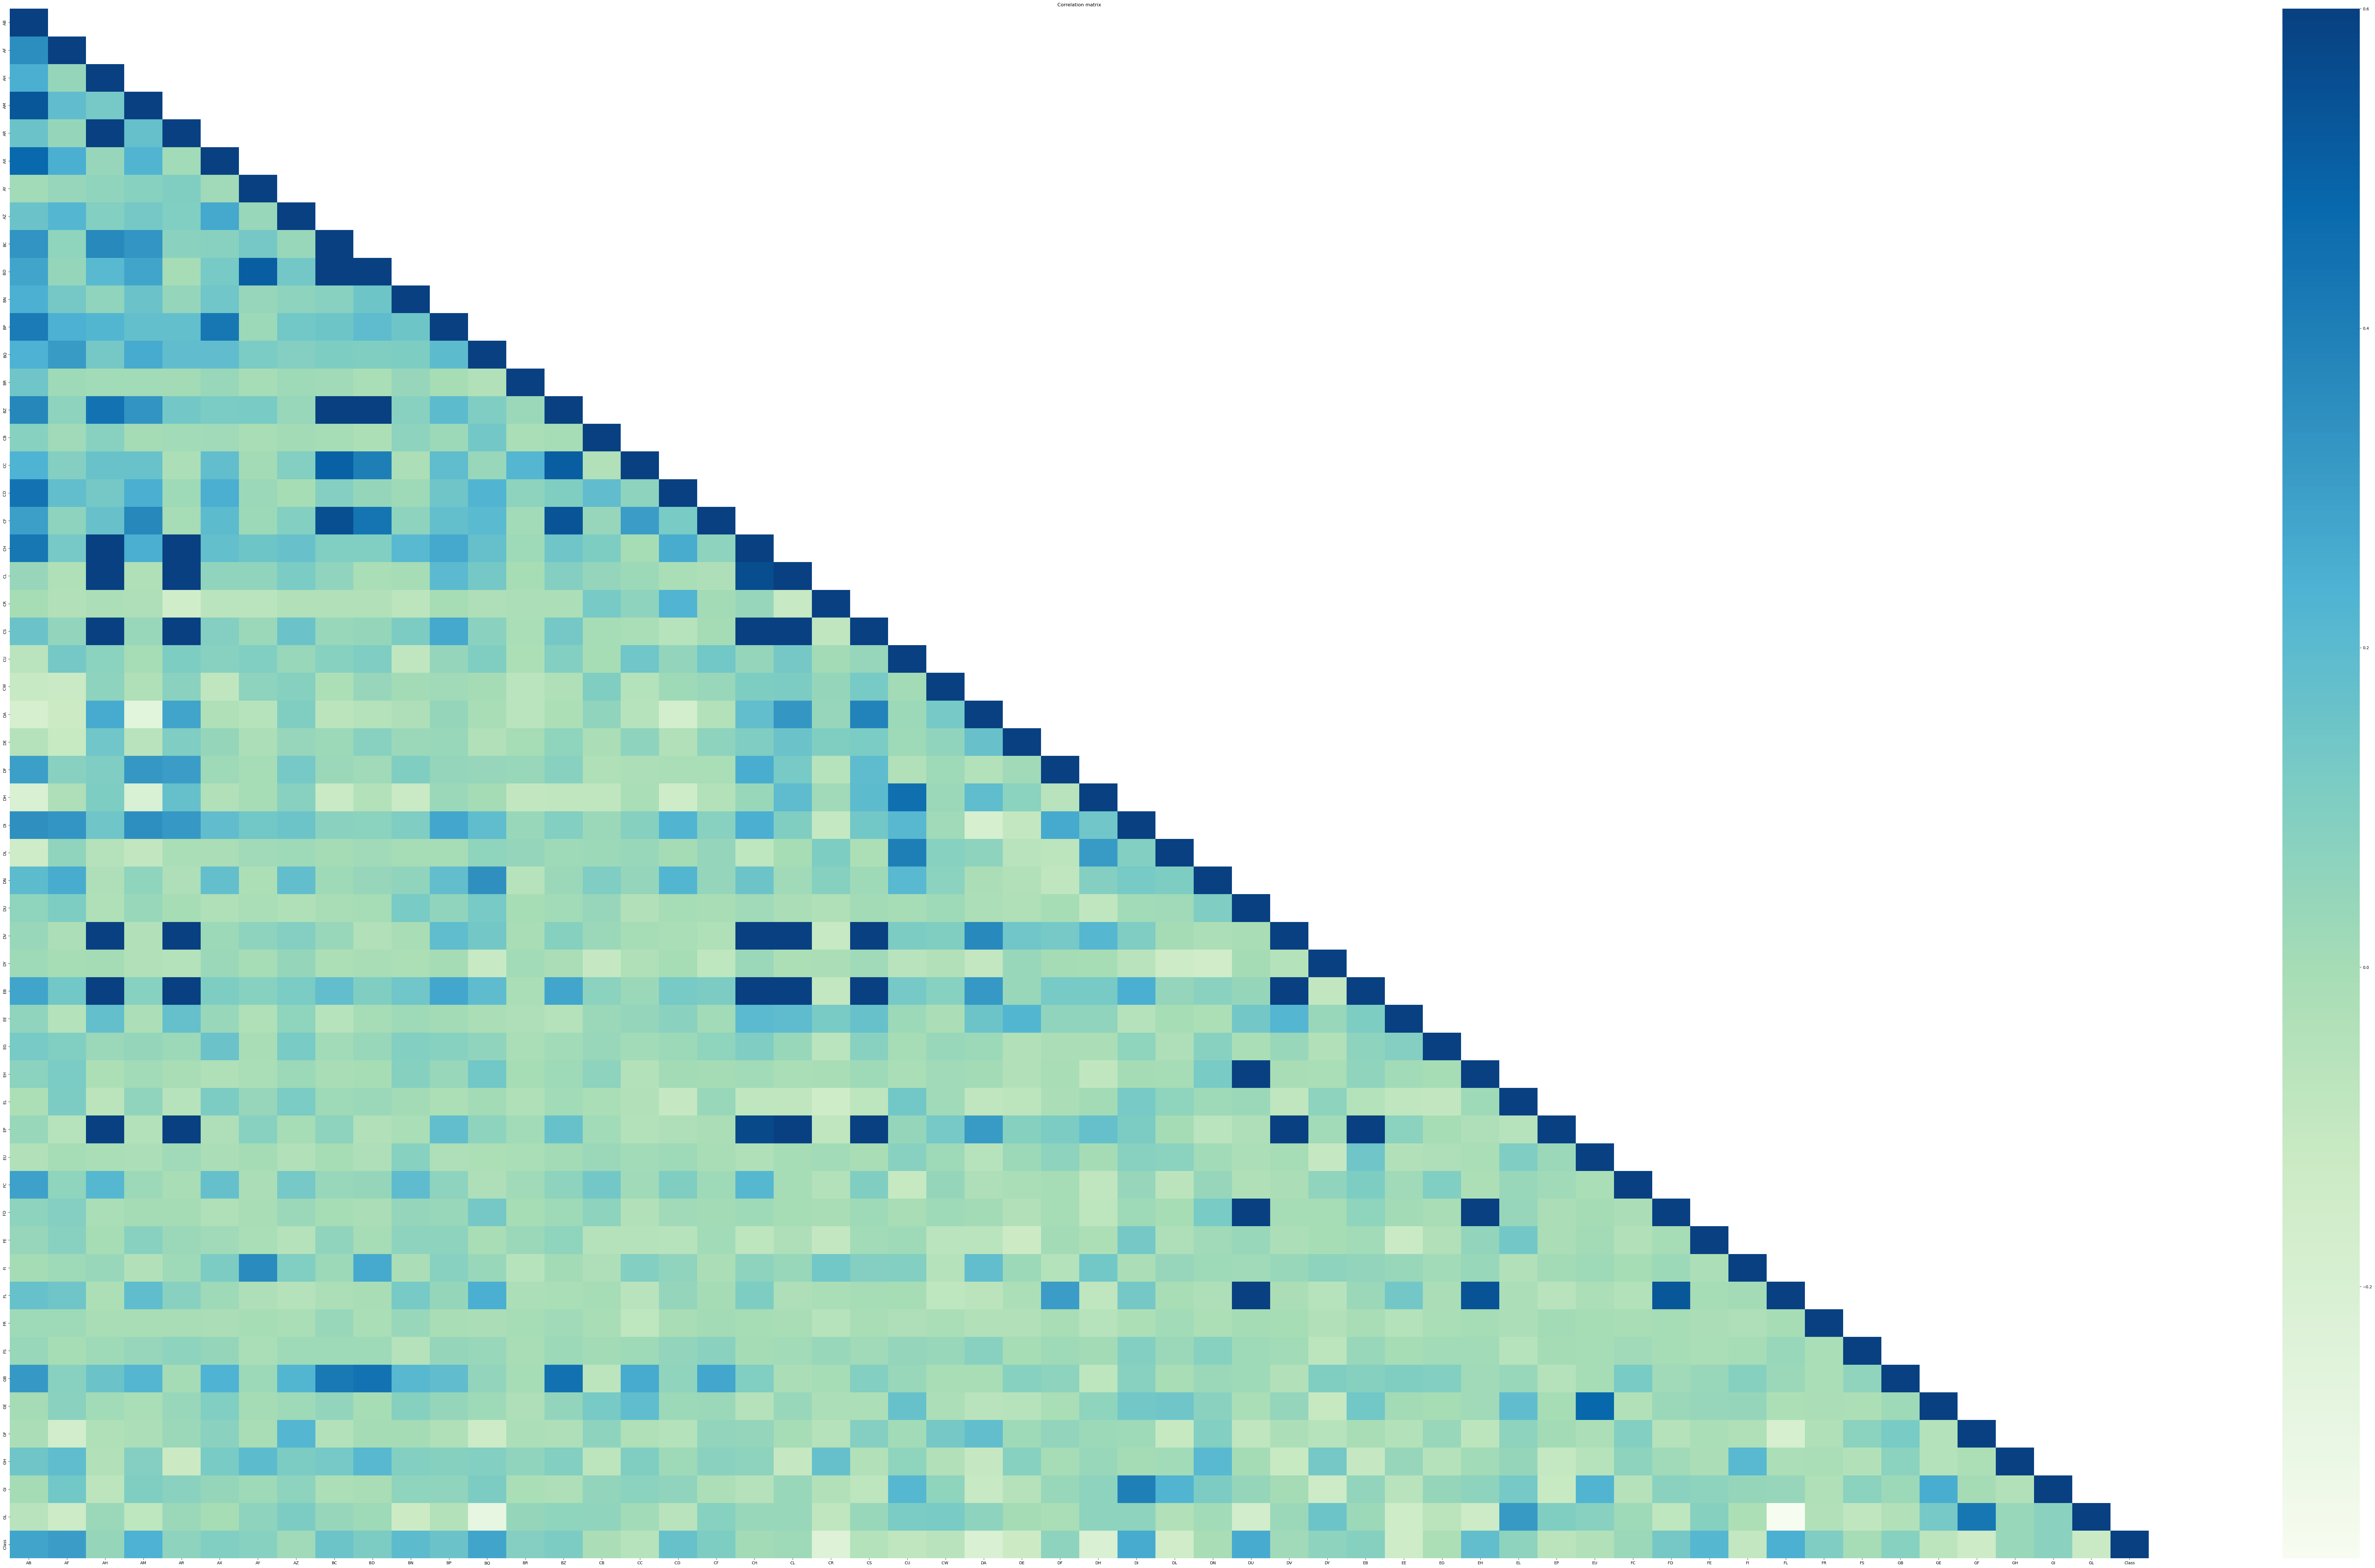

In [16]:
# finding the correlation of numerical variables
corr = df.corr()

# Deleting the half of the plot as it is replication of the other half
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

# Heat map for Visualization of attributes correlation
fig, ax = plt.subplots(figsize=(120,70))
sns.heatmap(corr, mask=mask, vmax=0.6, ax=ax, cmap='GnBu')
ax.set_title('Correlation matrix')
plt.show()

The heatmap provides a clear visual representation of the correlation between different numerical variables in the dataset.
Dark blue cells in the heatmap indicate strong positive correlations between the corresponding variables. This means that when one variable increases, the other variable tends to increase as well, and vice versa.
Dark green cells in the heatmap indicate strong negative correlations between the corresponding variables. This means that when one variable increases, the other variable tends to decrease, and vice versa.
The diagonal cells of the heatmap are perfectly correlated, as they represent the correlation of each variable with itself. This is evident by the correlation coefficient being 1.0 for these cells. It is a trivial correlation as each variable perfectly correlates with itself.
The mask applied to the heatmap hides the lower triangular part, avoiding the replication of information due to the symmetry of the correlation matrix. This ensures that only the upper triangular part of the matrix is displayed in the heatmap.

###    Imputing Missing Values

In [17]:
# Identify the numerical variables that have missing values
variables_with_missing = ['EL', 'BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']

# Perform hot deck imputation for each
for var in variables_with_missing:
    
    # Create a donor pool
    donor_pool = df[df[var].notnull()]

    # Identify numeric columns for similarity calculation
    numeric_columns = donor_pool.select_dtypes(include=np.number).columns

    # Iterate over each observation with a missing value
    for index, row in df[df[var].isnull()].iterrows():
        
        # Calculate similarity measure (e.g., Euclidean distance) between the observation and donors
        similarities = np.sqrt(np.sum((donor_pool[numeric_columns] - row[numeric_columns]).pow(2), axis=1))

        # Find the index of the donor with the closest match
        closest_donor_index = similarities.idxmin()

        # Transfer the observed value from the donor to the observation
        df.at[index, var] = donor_pool.at[closest_donor_index, var]
        
# Check the missing values again if any
df.isna().sum()

AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

Hot deck imputation is a method that replaces missing values with observed values from similar records (donors) within the dataset, a list named 'variables_with_missing' is created filling all the variables with missing values in it. After the imputation, there should be no missing values remaining in these specific numerical variables.The code assumes that similarity between observations is calculated based on the numeric columns in the donor pool.

### Changing Categorical column to numerical 

#### One-hot Encoding

In [18]:
# Convert the EJ class values into numerical values using one hot encoding
df = pd.get_dummies(data=df, columns=['EJ'], drop_first=True)
df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,Class,EJ_B
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,1
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,1
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,1


### Outliers

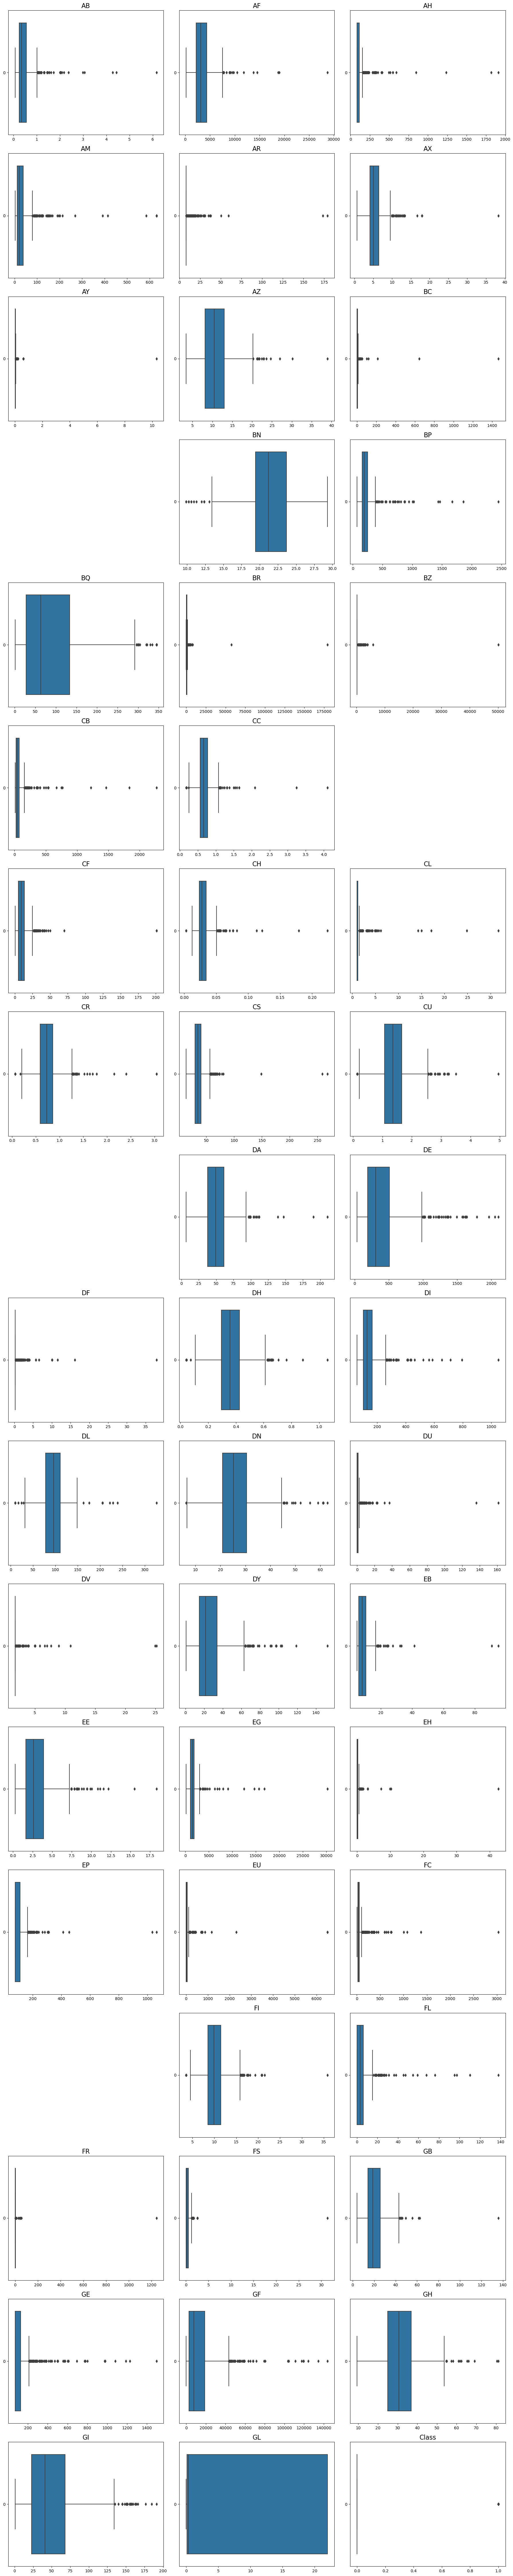

In [19]:
# List of numerical features to plot
numerical_features = ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG', 'EH', 'EP', 'EU', 'FC', 'FD', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class']

# Calculate the number of subplots needed based on the number of numerical features
num_rows = (len(numerical_features) - 1) // 3 + 1

# Create a subplot grid
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical feature's boxplot
for i, feature in enumerate(numerical_features):
    if feature in df.columns:
        sns.boxplot(ax=axes[i], data=df[feature], orient='h')
        axes[i].set_title(feature, fontsize=16)
    else:
        axes[i].axis('off')

# Hide any remaining empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### First Pipeline

In [20]:
# X contains the independent variables and y contains the dependent variable
X = df.drop('Class',axis=1)
y = df['Class']

### Normalization of features

- Normalization of features is the process of scaling the values of different features of a dataset to a common scale, typically between 0 and 1 or -1 and 1. This is done to ensure that each feature contributes equally to the analysis and to prevent features with larger values from dominating the analysis.

- Normalization is particularly important in machine learning algorithms that use distance-based metrics, such as k-nearest neighbors or clustering, because features with larger values will dominate the distance calculation. By normalizing the features, we can ensure that all features contribute equally to the distance calculation.

- There are several ways to normalize features, including min-max scaling, z-score scaling, and log scaling. Min-max scaling involves scaling the values to a range between 0 and 1 based on the minimum and maximum values of the feature

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data frame
normalized_data = scaler.fit_transform(X)

### Balance the Target Variable 'Class'

### **Target variable is imbalanced**

In [22]:
normalized_df = pd.DataFrame(normalized_data, columns=X.columns)

In [23]:
df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FR,FS,GB,GE,GF,GH,GI,GL,Class,EJ_B
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,1
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,1
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,1


In [24]:
normalized_df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,EJ_B
0,0.021082,0.102347,0.00000,0.030632,0.0,0.000000,0.000000,0.180337,0.002958,0.047364,...,0.051720,0.000998,0.000866,0.054959,0.000000,0.013846,0.176983,0.362261,0.005425,1.0
1,0.010541,0.027589,0.00000,0.053864,0.0,0.078048,0.000000,0.284500,0.000000,0.074042,...,0.000000,0.000000,0.016014,0.039418,0.000000,0.194527,0.274495,0.164135,1.000000,0.0
2,0.063949,0.085715,0.00000,0.046519,0.0,0.160575,0.000000,0.265013,0.000000,0.067011,...,0.054706,0.000385,0.036139,0.250424,0.011229,0.095035,0.258994,0.180218,0.008910,1.0
3,0.028110,0.127285,0.01918,0.117854,0.0,0.079462,0.000000,0.215235,0.000000,0.048203,...,0.043183,0.000000,0.006925,0.109565,0.006882,0.014475,0.425143,0.470820,0.007039,1.0
4,0.049192,0.124246,0.00000,0.017417,0.0,0.086300,0.002841,0.000000,0.069008,0.078555,...,0.057926,0.038597,0.001731,0.093459,0.051588,0.059198,0.500829,0.185841,0.004345,1.0


### Balance Dataframe by Smote

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust sampling_strategy as per your needs
X_balanced, y_balanced = smote.fit_resample(normalized_df, y)

# Convert the balanced data back to a DataFrame
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['Class'] = y_balanced

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
# Separate the features (X) and the target variable (y)
X = balanced_df.drop(columns=['Class'])
y = balanced_df['Class']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

Test Set Accuracy: 0.887
Training Set Accuracy: 0.859
Confusion Matrix:
[[86 13]
 [10 95]]
Accuracy: 0.887
Precision: 0.880
Recall (Sensitivity or True Positive Rate): 0.905
F1-score: 0.892
Specificity (True Negative Rate): 0.869
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        99
           1       0.88      0.90      0.89       105

    accuracy                           0.89       204
   macro avg       0.89      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204



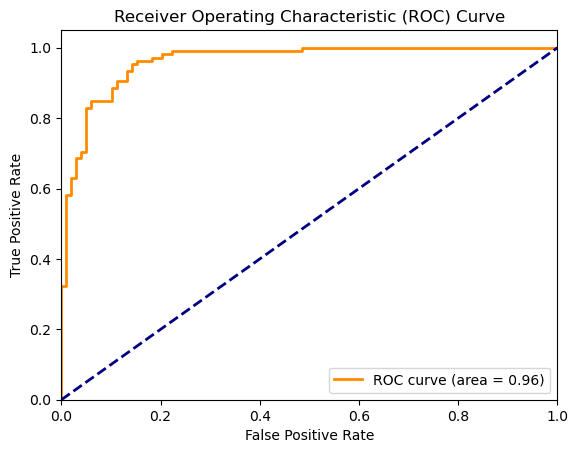

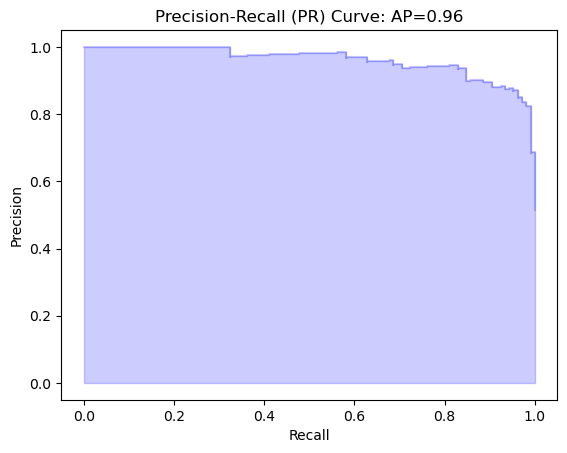

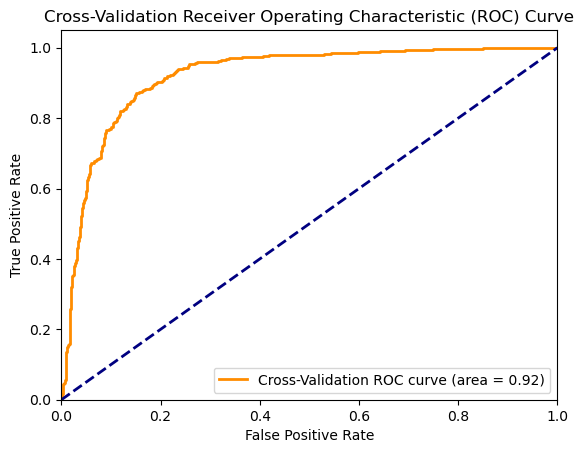

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Create and train the LogisticRegression model
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = LR.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Evaluation Metrics for Test Set
accuracy_test = accuracy_score(y_test, y_pred)

# Now, let's evaluate the model on the training set as well
y_pred_train = LR.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f'Test Set Accuracy: {accuracy_test:.3f}')
print(f'Training Set Accuracy: {accuracy_train:.3f}')

print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall (Sensitivity or True Positive Rate): {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Specificity (True Negative Rate): {specificity:.3f}')
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall (PR) Curve
average_precision = average_precision_score(y_test, y_pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# Cross-Validation
cv_scores = cross_val_predict(LR, X, y, cv=5, method='predict_proba')[:, 1]
cv_fpr, cv_tpr, _ = roc_curve(y, cv_scores)
cv_roc_auc = auc(cv_fpr, cv_tpr)

plt.figure()
plt.plot(cv_fpr, cv_tpr, color='darkorange', lw=2, label='Cross-Validation ROC curve (area = %0.2f)' % cv_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
accuracy_test = accuracy_score(y_test, y_pred)

This model performs reasonably well, with an accuracy of approximately 88.7%. It demonstrates a good balance between precision and recall, as indicated by the F1-score of 0.892. However, it may slightly favor the recall of the positive class (class 1) over the recall of the negative class (class 0) based on the higher sensitivity (recall) value for class 1. The specific performance of the model depends on the context and requirements of the classification task.The ROC curve and PR curve provide insights into the model's performance at different classification thresholds, while cross-validation helps assess the model's generalization ability on unseen data

### RANDOM FOREST CLASSIFIER

Training Accuracy: 1.000
Testing Accuracy: 0.980
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        99
           1       0.97      0.99      0.98       105

    accuracy                           0.98       204
   macro avg       0.98      0.98      0.98       204
weighted avg       0.98      0.98      0.98       204

Confusion Matrix:
[[ 96   3]
 [  1 104]]
Accuracy: 0.980
Precision: 0.972
Recall (Sensitivity or True Positive Rate): 0.990
F1-score: 0.981
Specificity (True Negative Rate): 0.970


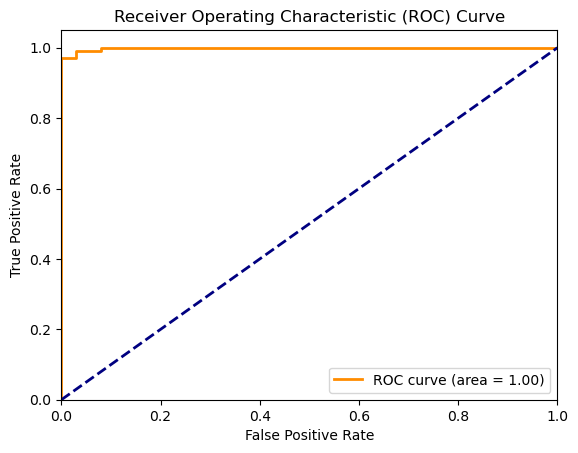

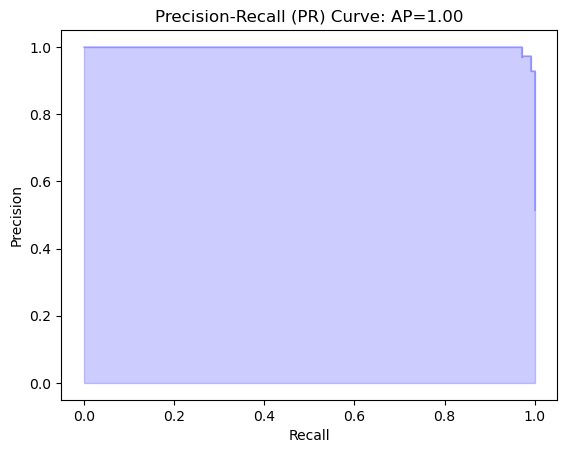

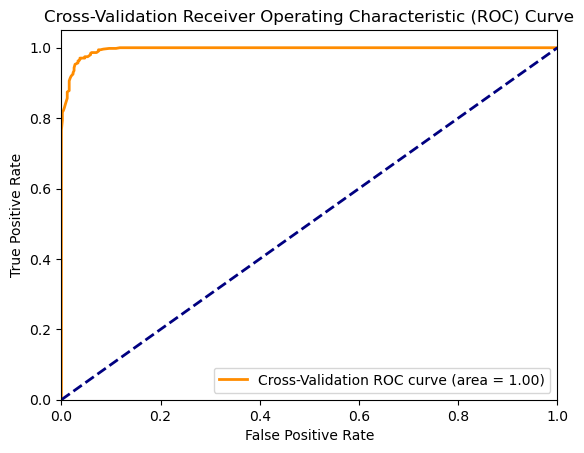

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Create and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Convert predicted probabilities to binary predictions based on a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate testing accuracy
accuracy_test = accuracy_score(y_test, y_pred)

# Predict on the training set to calculate training accuracy
y_train_pred = rf_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f'Training Accuracy: {accuracy_train:.3f}')
print(f'Testing Accuracy: {accuracy_test:.3f}')

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall (Sensitivity or True Positive Rate): {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Specificity (True Negative Rate): {specificity:.3f}')

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall (PR) Curve
average_precision = average_precision_score(y_test, y_pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# Cross-Validation
cv_scores = cross_val_predict(rf_classifier, X, y, cv=5, method='predict_proba')[:, 1]
cv_fpr, cv_tpr, _ = roc_curve(y, cv_scores)
cv_roc_auc = auc(cv_fpr, cv_tpr)

plt.figure()
plt.plot(cv_fpr, cv_tpr, color='darkorange', lw=2, label='Cross-Validation ROC curve (area = %0.2f)' % cv_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

this model performs excellently with an accuracy of approximately 98.0%. It demonstrates high precision and recall for both classes, indicating that it is effective in correctly classifying both positive and negative instances. The F1-score confirms a good balance between precision and recall. The model also has a high specificity, indicating its ability to correctly identify negative instances. Overall, it is a strong binary classification model with impressive performance on the given dataset.

### XGBoost model

Training Accuracy: 1.000
Confusion Matrix:
[[ 97   2]
 [  0 105]]
Testing Accuracy: 0.990
Precision: 0.981
Recall (Sensitivity or True Positive Rate): 1.000
F1-score: 0.991
Specificity (True Negative Rate): 0.980
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        99
           1       0.98      1.00      0.99       105

    accuracy                           0.99       204
   macro avg       0.99      0.99      0.99       204
weighted avg       0.99      0.99      0.99       204



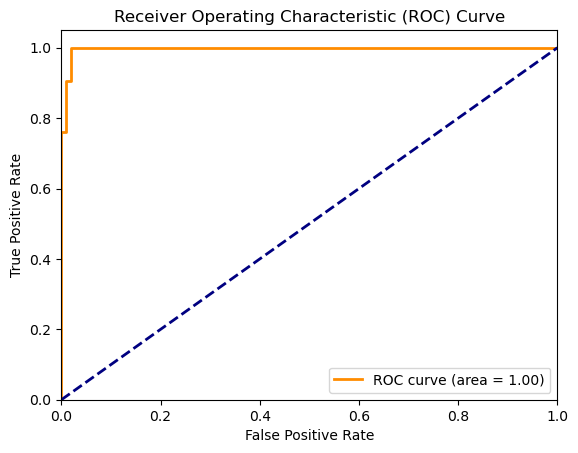

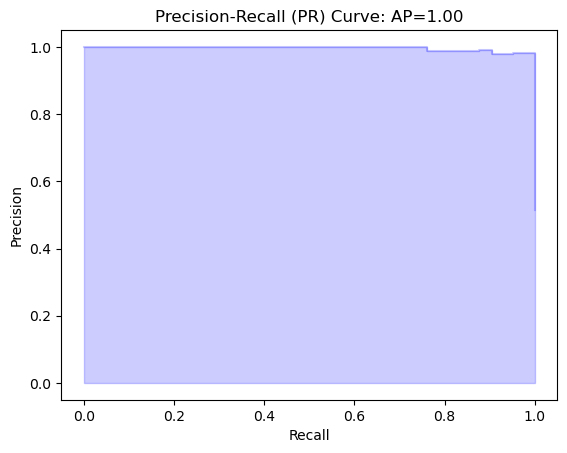

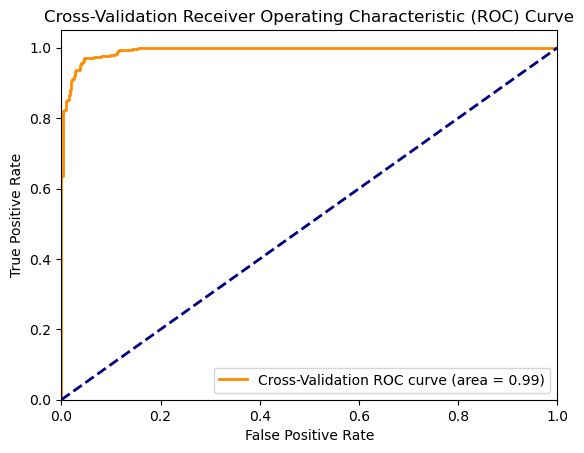

In [33]:
import xgboost as xgb

def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class (class 1)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Convert predicted probabilities to binary predictions based on a threshold of 0.5
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Calculate accuracy for training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate accuracy for testing set
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    print(f'Training Accuracy: {train_accuracy:.3f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print(f'Testing Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall (Sensitivity or True Positive Rate): {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    print(f'Specificity (True Negative Rate): {specificity:.3f}')

    # Evaluation Metrics
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall (PR) Curve
    average_precision = average_precision_score(y_test, y_pred_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall (PR) Curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

    # Cross-Validation
    cv_scores = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    cv_fpr, cv_tpr, _ = roc_curve(y_train, cv_scores)
    cv_roc_auc = auc(cv_fpr, cv_tpr)

    plt.figure()
    plt.plot(cv_fpr, cv_tpr, color='darkorange', lw=2, label='Cross-Validation ROC curve (area = %0.2f)' % cv_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Cross-Validation Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Create and train the XGBoost model
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
evaluate_model_performance(xgb_classifier, X_train, y_train, X_test, y_test)

### A Voting Classifier is an ensemble learning technique in machine learning where multiple individual models (classifiers) are combined to make a final prediction

Training Accuracy: 1.000
Confusion Matrix:
[[ 97   2]
 [  0 105]]
Testing Accuracy: 0.990
Precision: 0.981
Recall (Sensitivity or True Positive Rate): 1.000
F1-score: 0.991
Specificity (True Negative Rate): 0.980


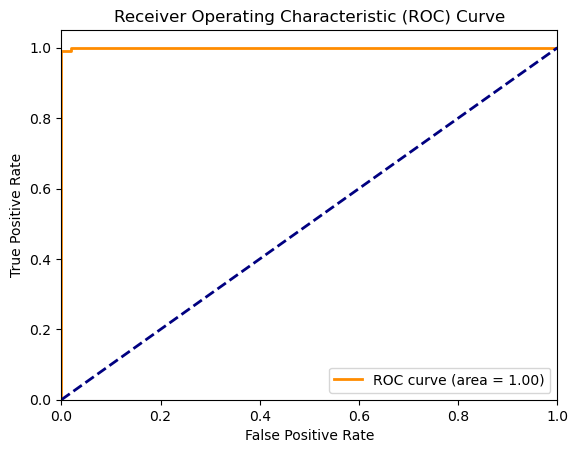

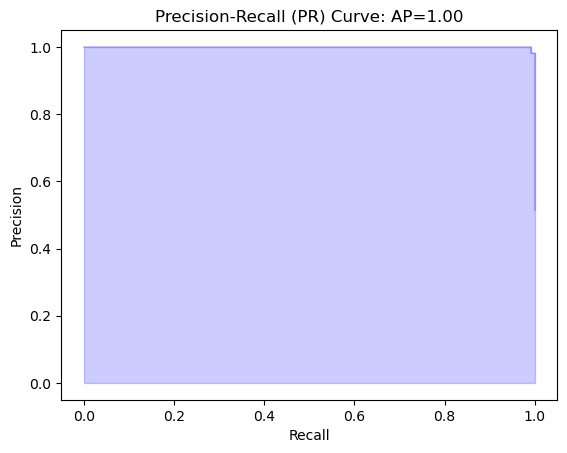

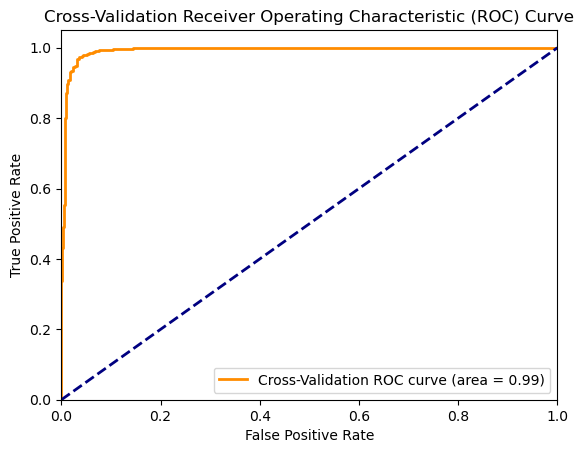

In [34]:
from sklearn.ensemble import VotingClassifier

logistic_classifier = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('logistic', logistic_classifier), ('rf', rf_classifier), ('xgb', xgb_classifier)],
    voting='soft',  # Use 'soft' voting to take into account probabilities
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = ensemble_model.predict_proba(X_test)[:, 1]

# Convert predicted probabilities to binary predictions based on a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy for training set
y_train_pred = ensemble_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for testing set
test_accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(f'Training Accuracy: {train_accuracy:.3f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Testing Accuracy: {test_accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall (Sensitivity or True Positive Rate): {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Specificity (True Negative Rate): {specificity:.3f}')

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall (PR) Curve
average_precision = average_precision_score(y_test, y_pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# Cross-Validation
cv_scores = cross_val_predict(ensemble_model, X, y, cv=5, method='predict_proba')[:, 1]
cv_fpr, cv_tpr, _ = roc_curve(y, cv_scores)
cv_roc_auc = auc(cv_fpr, cv_tpr)

plt.figure()
plt.plot(cv_fpr, cv_tpr, color='darkorange', lw=2, label='Cross-Validation ROC curve (area = %0.2f)' % cv_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Cross Validation

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        99
           1       0.98      1.00      0.99       105

    accuracy                           0.99       204
   macro avg       0.99      0.99      0.99       204
weighted avg       0.99      0.99      0.99       204

Confusion Matrix:
[[ 97   2]
 [  0 105]]
Accuracy: 0.990
Precision: 0.981
Recall (Sensitivity or True Positive Rate): 1.000
F1-score: 0.991
Specificity (True Negative Rate): 0.980


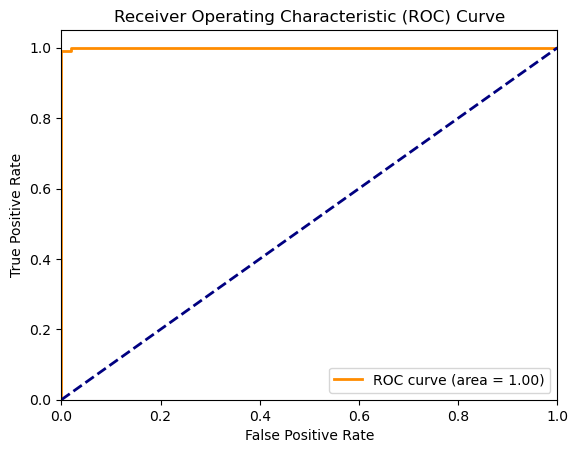

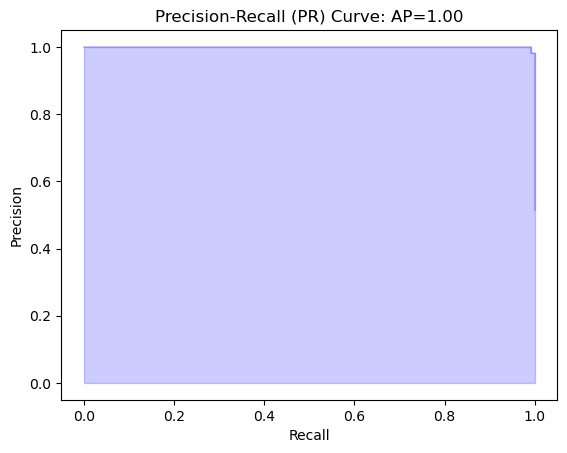

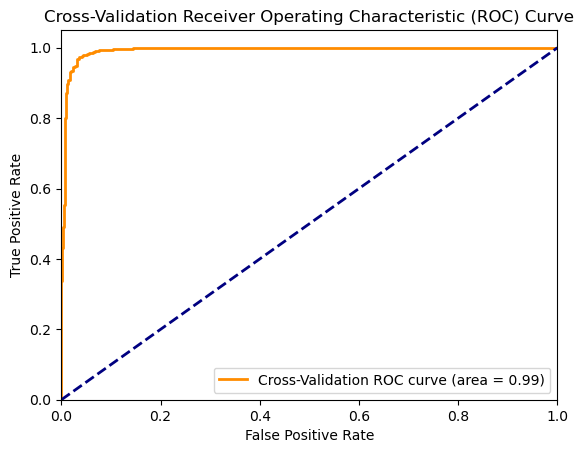

In [35]:
from sklearn.ensemble import VotingClassifier
logistic_classifier = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('logistic', logistic_classifier), ('rf', rf_classifier), ('xgb', xgb_classifier)],
    voting='soft',  # Use 'soft' voting to take into account probabilities
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = ensemble_model.predict_proba(X_test)[:, 1]

# Convert predicted probabilities to binary predictions based on a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall (Sensitivity or True Positive Rate): {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Specificity (True Negative Rate): {specificity:.3f}')

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall (PR) Curve
average_precision = average_precision_score(y_test, y_pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# Cross-Validation
cv_scores = cross_val_predict(ensemble_model, X, y, cv=5, method='predict_proba')[:, 1]
cv_fpr, cv_tpr, _ = roc_curve(y, cv_scores)
cv_roc_auc = auc(cv_fpr, cv_tpr)

plt.figure()
plt.plot(cv_fpr, cv_tpr, color='darkorange', lw=2, label='Cross-Validation ROC curve (area = %0.2f)' % cv_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

RandomForestClassifier was a bit consistent across the five folds with an average accuracy of 96.08%. 
This indicates that the model is capable of generalizing well to unseen data and is suitable for the 
classification task at hand.

XGBClassifier performed well with high accuracy across the folds, with an average accuracy of around 95.59%. 
The model has good performance, similar to the RandomForestClassifier.


LogisticRegression model had the least performace compared to other models with an average accuracy of 80.76%. 
Though it still shows decent performance, it is outperformed other models used.

Model: VotingClassifier
Accuracy scores for each fold: 0.98529412 0.97058824 0.96568627 0.95073892 0.96059113
Average accuracy: 0.9665797353424128

## Summary

To conclude, Voting Classifier,the RandomForestClassifier and XGBClassifier models had the best performance with the highest average accuracy compared to other models used. 
My team recommended them for this classification task due to their high performance in terms of their average accuracy. However, the choice of the final 
model also depends on other factors, such as interpretability, computational complexity, and the specific requirements of the application. Further analysis and fine-tuning will be conducted using Gridsearch 
to select the best model.

The LogisticRegression model, although showing decent accuracy, might benefit from further optimization or feature engineering 
to improve its performance.